In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('modified_data_v2.csv')

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df.head()

,shop_id,shop_area_sq_ft,shop_profile,quantity_sold,tot_sales_amount,customer_id,invoice_id,transaction_date,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,FIT O MANGO 200ML,FIT O MIXED FRUIT 1L,FIT O MIXED FRUIT 200ML,FIT O ORANGE 1L,FIT O ORANGE 200ML,GINGER BEER 1.5L,GINGER BEER 1L,GINGER BEER 400ML,GINGER BEER 500ML,GINGER BEER SUGAR FREE 500ML,KIK COLA 1L,LEMONADE 1.5L,LEMONADE 1L,LEMONADE 500ML,LIME CRUSH JUICE 1L,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
0,SHOP047,528,Moderate,1692,842960,928,1302,62,42,124,0,249,28,278,71,8,66,87,31,44,66,137,306,189,51,84,26,7,41,19,31,0,102,6,25,113,59,47,39,88,60,126,52,116,30
1,SHOP009,676,High,4589,1970870,2498,3493,62,123,427,0,686,62,451,203,56,76,102,115,182,208,223,1018,552,69,254,96,30,194,15,113,0,338,24,79,333,175,17,109,145,219,144,67,135,51
2,SHOP083,676,Low,3614,1691985,1900,2718,62,81,256,3,592,76,408,186,67,93,89,95,92,211,172,734,559,29,122,67,43,168,15,63,0,286,29,40,359,134,27,55,151,162,160,109,117,48
3,SHOP117,676,Low,4074,2325980,2037,3158,62,116,152,0,565,58,343,318,155,115,166,110,188,216,150,797,468,56,81,85,72,182,30,57,0,402,10,45,339,82,49,58,449,418,513,98,390,43
4,SHOP042,676,Low,3272,1340215,1841,2495,62,91,228,0,478,40,385,138,74,98,66,67,53,183,142,666,467,47,147,68,25,131,34,57,0,178,7,26,265,77,18,46,143,211,165,125,140,48


In [5]:
df.iloc[100:].head()

,shop_id,shop_area_sq_ft,shop_profile,quantity_sold,tot_sales_amount,customer_id,invoice_id,transaction_date,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,FIT O MANGO 200ML,FIT O MIXED FRUIT 1L,FIT O MIXED FRUIT 200ML,FIT O ORANGE 1L,FIT O ORANGE 200ML,GINGER BEER 1.5L,GINGER BEER 1L,GINGER BEER 400ML,GINGER BEER 500ML,GINGER BEER SUGAR FREE 500ML,KIK COLA 1L,LEMONADE 1.5L,LEMONADE 1L,LEMONADE 500ML,LIME CRUSH JUICE 1L,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
100,SHOP046,545,NaN,3438,2607865,1736,2735,62,294,742,0,688,49,351,124,51,64,85,105,112,193,112,673,234,51,105,69,28,105,15,69,0,460,30,38,235,145,33,73,235,275,320,72,305,15
101,SHOP024,676,NaN,2883,1308795,1641,2302,62,224,264,0,516,50,390,73,72,76,66,70,112,141,76,568,194,81,126,103,18,73,12,29,0,330,14,34,219,128,21,47,129,116,188,62,128,35
102,SHOP023,617,NaN,4103,2570425,2227,3138,62,118,189,2,982,63,571,169,101,94,169,100,274,165,106,893,273,11,138,107,27,203,62,22,0,391,34,36,435,106,31,67,120,229,411,76,213,38
103,SHOP097,310,NaN,3148,2642380,1669,2436,62,189,314,0,301,0,296,97,225,87,105,83,128,317,129,669,0,32,228,121,12,210,34,84,0,215,0,46,206,88,0,55,237,488,281,85,651,36
104,SHOP044,715,NaN,2641,1310440,1552,2082,62,72,21,0,365,20,277,64,137,41,77,54,79,101,66,544,210,26,101,42,28,66,28,47,0,149,25,41,217,26,26,36,373,376,358,55,280,30


In [6]:
train = df.iloc[:100].copy()
test = df.iloc[100:].copy()

In [7]:
train = train.drop(columns=['shop_id'])

In [8]:
test = test.drop(columns=['shop_id'])

In [9]:
train['shop_profile'] = train['shop_profile'].replace({'High':2, 'Moderate':1, 'Low':0})

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   shop_area_sq_ft               100 non-null    int64
 1   shop_profile                  100 non-null    int64
 2   quantity_sold                 100 non-null    int64
 3   tot_sales_amount              100 non-null    int64
 4   customer_id                   100 non-null    int64
 5   invoice_id                    100 non-null    int64
 6   transaction_date              100 non-null    int64
 7   item_description              100 non-null    int64
 8   BOTTLED DRINKING WATER 1.5L   100 non-null    int64
 9   BOTTLED DRINKING WATER 500ML  100 non-null    int64
 10  CHOCOLATE MILK 180ML          100 non-null    int64
 11  CREAM SODA 1.5L               100 non-null    int64
 12  CREAM SODA 1L                 100 non-null    int64
 13  CREAM SODA 500ML              100 no

In [11]:
X = train.drop(columns=['shop_profile']).values
Y = train['shop_profile'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Cluster Analysis

In [12]:
import warnings
warnings.filterwarnings('ignore')

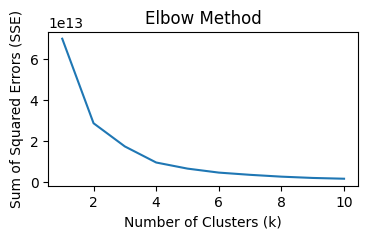

In [13]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

# Fit KMeans algorithm for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the SSE values against the number of clusters (k)
plt.figure(figsize=(4,2))
plt.plot(range(1, 11), sse)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method")
plt.show()

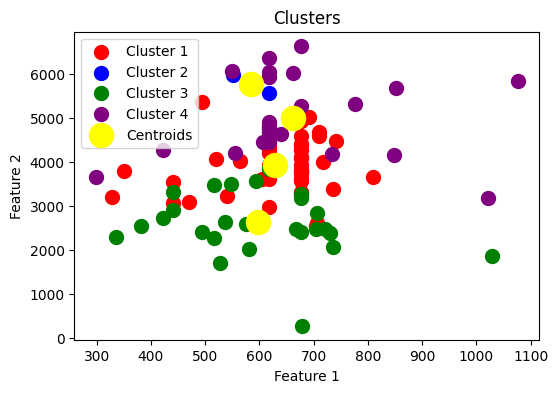

In [14]:
# Perform KMeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='purple', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [15]:
cluster_pred = pd.DataFrame()
cluster_pred['Actual'] = Y
cluster_pred['KMeans_Pred'] = y_kmeans
cluster_pred.head()

,Actual,KMeans_Pred
0,1,2
1,2,0
2,0,0
3,0,0
4,0,2


In [16]:
cluster_pred.corr()

,Actual,KMeans_Pred
Actual,1.00000,0.16805
KMeans_Pred,0.16805,1.00000


In [17]:
freq_table = pd.crosstab(cluster_pred['KMeans_Pred'], cluster_pred['Actual'])
freq_table

Actual,0,1,2
KMeans_Pred,,,
0,20,12,14
1,0,0,2
2,13,13,1
3,3,8,14


In [18]:
cluster_pred['Actual'] = cluster_pred['Actual'].replace({2:'High', 1:'Moderate', 0:'Low'})
cluster_pred["KMeans_Pred"] = cluster_pred["KMeans_Pred"].replace({3:'High', 1:'High', 2:'Moderate', 0:'Low'})

In [19]:
freq_table1 = pd.crosstab(cluster_pred['KMeans_Pred'], cluster_pred['Actual'])
freq_table1

Actual,High,Low,Moderate
KMeans_Pred,,,
High,16,3,8
Low,14,20,12
Moderate,1,13,13


In [20]:
freq_table1 = pd.crosstab(cluster_pred['KMeans_Pred'], cluster_pred['Actual'])
freq_table1

Actual,High,Low,Moderate
KMeans_Pred,,,
High,16,3,8
Low,14,20,12
Moderate,1,13,13


In [21]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    task_type="GPU",
    iterations=1000,
    random_seed=0,
    learning_rate=0.01
)
model.fit(
    x_train, y_train,
#     cat_features=cat_cols,
#     eval_set=(X_val, y_val),
#     logging_level='Silent'
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

0:	learn: 1.0931006	total: 7.79ms	remaining: 7.79s
1:	learn: 1.0876476	total: 15.6ms	remaining: 7.78s
2:	learn: 1.0834038	total: 22.5ms	remaining: 7.46s
3:	learn: 1.0783325	total: 29.2ms	remaining: 7.26s
4:	learn: 1.0725815	total: 35.4ms	remaining: 7.04s
5:	learn: 1.0676848	total: 42.1ms	remaining: 6.97s
6:	learn: 1.0631767	total: 48.8ms	remaining: 6.92s
7:	learn: 1.0580361	total: 55.8ms	remaining: 6.92s
8:	learn: 1.0528316	total: 62.6ms	remaining: 6.89s
9:	learn: 1.0479468	total: 69.4ms	remaining: 6.87s
10:	learn: 1.0422560	total: 76.5ms	remaining: 6.88s
11:	learn: 1.0372658	total: 83.3ms	remaining: 6.86s
12:	learn: 1.0325356	total: 90.2ms	remaining: 6.85s
13:	learn: 1.0285273	total: 97.3ms	remaining: 6.86s
14:	learn: 1.0236922	total: 104ms	remaining: 6.85s
15:	learn: 1.0187500	total: 111ms	remaining: 6.84s
16:	learn: 1.0141748	total: 118ms	remaining: 6.83s
17:	learn: 1.0096992	total: 126ms	remaining: 6.85s
18:	learn: 1.0052717	total: 133ms	remaining: 6.87s
19:	learn: 1.0004916	total:

168:	learn: 0.5696927	total: 1.24s	remaining: 6.08s
169:	learn: 0.5679737	total: 1.24s	remaining: 6.07s
170:	learn: 0.5662249	total: 1.25s	remaining: 6.06s
171:	learn: 0.5642858	total: 1.26s	remaining: 6.06s
172:	learn: 0.5625368	total: 1.26s	remaining: 6.05s
173:	learn: 0.5606788	total: 1.27s	remaining: 6.04s
174:	learn: 0.5593307	total: 1.28s	remaining: 6.03s
175:	learn: 0.5577322	total: 1.29s	remaining: 6.02s
176:	learn: 0.5562755	total: 1.29s	remaining: 6.02s
177:	learn: 0.5545661	total: 1.3s	remaining: 6.01s
178:	learn: 0.5532537	total: 1.31s	remaining: 6s
179:	learn: 0.5514972	total: 1.31s	remaining: 5.99s
180:	learn: 0.5497245	total: 1.32s	remaining: 5.98s
181:	learn: 0.5479307	total: 1.33s	remaining: 5.97s
182:	learn: 0.5463358	total: 1.33s	remaining: 5.96s
183:	learn: 0.5447811	total: 1.34s	remaining: 5.95s
184:	learn: 0.5430973	total: 1.35s	remaining: 5.94s
185:	learn: 0.5412278	total: 1.36s	remaining: 5.93s
186:	learn: 0.5396170	total: 1.36s	remaining: 5.92s
187:	learn: 0.53

335:	learn: 0.3599645	total: 2.47s	remaining: 4.88s
336:	learn: 0.3590654	total: 2.48s	remaining: 4.88s
337:	learn: 0.3582814	total: 2.49s	remaining: 4.88s
338:	learn: 0.3574052	total: 2.5s	remaining: 4.87s
339:	learn: 0.3565566	total: 2.51s	remaining: 4.87s
340:	learn: 0.3557116	total: 2.51s	remaining: 4.86s
341:	learn: 0.3548100	total: 2.52s	remaining: 4.85s
342:	learn: 0.3539595	total: 2.53s	remaining: 4.85s
343:	learn: 0.3532096	total: 2.54s	remaining: 4.84s
344:	learn: 0.3525510	total: 2.54s	remaining: 4.83s
345:	learn: 0.3515785	total: 2.55s	remaining: 4.83s
346:	learn: 0.3507041	total: 2.56s	remaining: 4.82s
347:	learn: 0.3498038	total: 2.57s	remaining: 4.81s
348:	learn: 0.3491670	total: 2.58s	remaining: 4.8s
349:	learn: 0.3482919	total: 2.58s	remaining: 4.8s
350:	learn: 0.3474298	total: 2.59s	remaining: 4.79s
351:	learn: 0.3467455	total: 2.6s	remaining: 4.78s
352:	learn: 0.3460373	total: 2.6s	remaining: 4.78s
353:	learn: 0.3451684	total: 2.61s	remaining: 4.77s
354:	learn: 0.344

501:	learn: 0.2513806	total: 3.71s	remaining: 3.68s
502:	learn: 0.2509127	total: 3.71s	remaining: 3.67s
503:	learn: 0.2505288	total: 3.72s	remaining: 3.66s
504:	learn: 0.2499969	total: 3.73s	remaining: 3.66s
505:	learn: 0.2495718	total: 3.74s	remaining: 3.65s
506:	learn: 0.2490933	total: 3.75s	remaining: 3.64s
507:	learn: 0.2486862	total: 3.75s	remaining: 3.63s
508:	learn: 0.2482477	total: 3.76s	remaining: 3.63s
509:	learn: 0.2477355	total: 3.77s	remaining: 3.62s
510:	learn: 0.2472111	total: 3.78s	remaining: 3.61s
511:	learn: 0.2467083	total: 3.78s	remaining: 3.61s
512:	learn: 0.2461566	total: 3.79s	remaining: 3.6s
513:	learn: 0.2457215	total: 3.8s	remaining: 3.59s
514:	learn: 0.2450509	total: 3.81s	remaining: 3.58s
515:	learn: 0.2445646	total: 3.81s	remaining: 3.58s
516:	learn: 0.2441062	total: 3.82s	remaining: 3.57s
517:	learn: 0.2435725	total: 3.83s	remaining: 3.56s
518:	learn: 0.2430268	total: 3.84s	remaining: 3.56s
519:	learn: 0.2425845	total: 3.84s	remaining: 3.55s
520:	learn: 0.

662:	learn: 0.1879582	total: 4.93s	remaining: 2.51s
663:	learn: 0.1876514	total: 4.94s	remaining: 2.5s
664:	learn: 0.1873555	total: 4.95s	remaining: 2.49s
665:	learn: 0.1870981	total: 4.96s	remaining: 2.48s
666:	learn: 0.1868567	total: 4.96s	remaining: 2.48s
667:	learn: 0.1865225	total: 4.97s	remaining: 2.47s
668:	learn: 0.1861138	total: 4.98s	remaining: 2.46s
669:	learn: 0.1858917	total: 4.99s	remaining: 2.46s
670:	learn: 0.1855415	total: 4.99s	remaining: 2.45s
671:	learn: 0.1852016	total: 5s	remaining: 2.44s
672:	learn: 0.1849281	total: 5.01s	remaining: 2.43s
673:	learn: 0.1845484	total: 5.02s	remaining: 2.43s
674:	learn: 0.1841299	total: 5.02s	remaining: 2.42s
675:	learn: 0.1838526	total: 5.03s	remaining: 2.41s
676:	learn: 0.1835642	total: 5.04s	remaining: 2.4s
677:	learn: 0.1831904	total: 5.04s	remaining: 2.4s
678:	learn: 0.1829719	total: 5.05s	remaining: 2.39s
679:	learn: 0.1827110	total: 5.06s	remaining: 2.38s
680:	learn: 0.1824315	total: 5.07s	remaining: 2.37s
681:	learn: 0.1821

825:	learn: 0.1465735	total: 6.17s	remaining: 1.3s
826:	learn: 0.1462704	total: 6.18s	remaining: 1.29s
827:	learn: 0.1459638	total: 6.19s	remaining: 1.28s
828:	learn: 0.1457516	total: 6.2s	remaining: 1.28s
829:	learn: 0.1455546	total: 6.21s	remaining: 1.27s
830:	learn: 0.1452927	total: 6.21s	remaining: 1.26s
831:	learn: 0.1451092	total: 6.22s	remaining: 1.26s
832:	learn: 0.1449272	total: 6.23s	remaining: 1.25s
833:	learn: 0.1447603	total: 6.24s	remaining: 1.24s
834:	learn: 0.1445766	total: 6.25s	remaining: 1.23s
835:	learn: 0.1443882	total: 6.25s	remaining: 1.23s
836:	learn: 0.1442209	total: 6.26s	remaining: 1.22s
837:	learn: 0.1440087	total: 6.27s	remaining: 1.21s
838:	learn: 0.1438276	total: 6.28s	remaining: 1.21s
839:	learn: 0.1435844	total: 6.29s	remaining: 1.2s
840:	learn: 0.1433954	total: 6.3s	remaining: 1.19s
841:	learn: 0.1432296	total: 6.31s	remaining: 1.18s
842:	learn: 0.1430901	total: 6.32s	remaining: 1.18s
843:	learn: 0.1429402	total: 6.33s	remaining: 1.17s
844:	learn: 0.14

996:	learn: 0.1178840	total: 7.63s	remaining: 23ms
997:	learn: 0.1177418	total: 7.64s	remaining: 15.3ms
998:	learn: 0.1175974	total: 7.65s	remaining: 7.66ms
999:	learn: 0.1174479	total: 7.66s	remaining: 0us
Model is fitted: True
Model params:
{'iterations': 1000, 'learning_rate': 0.01, 'random_seed': 0, 'task_type': 'GPU'}


In [22]:
pred = model.predict(x_test)

In [23]:
prediction = pd.DataFrame()
prediction['Actual'] = y_test
prediction['Presicted'] = pred
prediction

,Actual,Presicted
0,1,2
1,2,2
2,1,0
3,2,2
4,0,0
5,1,2
6,0,0
7,2,0
8,0,0
9,0,0


In [24]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average='micro')

0.5

In [25]:
cols= train.drop(columns=['shop_profile']).columns

In [26]:
pd.DataFrame({'names':cols, 'import':model.feature_importances_}).sort_values(by='import', ascending=False)

,names,import
8,BOTTLED DRINKING WATER 500ML,33.483238
29,LEMONADE 500ML,6.240437
31,NECTO 1.5L,5.465750
13,CREAM SODA APPLE POP 1L,4.833704
40,SODA PET 1.5L,4.069681
35,ORANGE CRUSH 1.5L,3.863281
41,STRAWBERRY MILK 180ML,3.574348
38,SODA 1L,2.393657
11,CREAM SODA 1L,2.391550
25,GINGER BEER SUGAR FREE 500ML,2.308350


In [27]:
y_test

array([1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1],
      dtype=int64)

In [28]:
from MLmodels import MachineLearningModels
MachineLearningModels.ml_model(x_train, y_train, x_test, y_test)

Logistic Regression: 

[0.375  0.5625 0.5625 0.5625 0.5   ]
f1 score: 51.25 %

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.50      0.29      0.36         7
           2       0.43      0.50      0.46         6

    accuracy                           0.50        20
   macro avg       0.49      0.50      0.48        20
weighted avg       0.50      0.50      0.48        20


Confusion Matrix:
[[5 1 1]
 [2 2 3]
 [2 1 3]]
---------------------------------------------------------------------------------------
Gaussian Naive Bayes: 

[0.375  0.8125 0.5625 0.5625 0.375 ]
f1 score: 53.75 %

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.33      0.14      0.20         7
           2       0.71      0.83      0.77         6

    accuracy                           0.55        20
   macr

In [29]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import RidgeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from lightgbm import LGBMClassifier
# from mlxtend.classifier import StackingClassifier
# import matplotlib.gridspec as gridspec
# from sklearn.tree import DecisionTreeClassifier

# import itertools
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec

# from sklearn.model_selection import cross_val_score, train_test_split

# from mlxtend.plotting import plot_learning_curves
# from mlxtend.plotting import plot_decision_regions

# X, y = x_train, y_train

# clf1 = KNeighborsClassifier()
# clf2 = RandomForestClassifier(random_state=1)
# clf3 = LogisticRegression()
# clf4 = DecisionTreeClassifier()
# lr = LGBMClassifier()
# sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
#                           meta_classifier=lr)

In [30]:
# label = ['KNN', 'Random Forest', 'LogisticRegression', 'Stacking Classifier']
# clf_list = [clf1, clf2, clf3, sclf]
    
# fig = plt.figure(figsize=(10,8))
# gs = gridspec.GridSpec(2, 2)
# grid = itertools.product([0,1],repeat=2)

# clf_cv_mean = []
# clf_cv_std = []
# for clf, label, grd in zip(clf_list, label, grid):
        
#     scores = cross_val_score(clf, X, y, cv=5, scoring='f1_micro')
#     print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
#     clf_cv_mean.append(scores.mean())
#     clf_cv_std.append(scores.std())
        
#     clf.fit(X, y)

In [31]:
y_pred_final = sclf.predict(x_test)

NameError: name 'sclf' is not defined

In [32]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_final, average='micro')

NameError: name 'y_pred_final' is not defined

In [41]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

XGB = LGBMClassifier()
XGB.fit(x_train, y_train)
pred_xgb = XGB.predict(x_test)

In [42]:
prediction = pd.DataFrame()
prediction['Actual'] = y_test
prediction['Presicted'] = pred_xgb
prediction

,Actual,Presicted
0,1,2
1,2,2
2,1,1
3,2,2
4,0,0
5,1,2
6,0,0
7,2,2
8,0,0
9,0,0


In [43]:
prediction.Presicted.value_counts()

2    8
0    7
1    5
Name: Presicted, dtype: int64

In [44]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_xgb, average='micro')

0.7

In [22]:
# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import roc_auc_score
# import pandas as pd
# import numpy as np


# # Create LightGBM dataset
# train_data = lgb.Dataset(x_train, label=y_train)

# # Define hyperparameters
# # Define hyperparameters
# params = {'objective': 'multiclass',
#           'num_classes': 3}

# # Create Grid Search object
# grid = GridSearchCV(estimator=lgb.LGBMClassifier(**params),
#                     param_grid={'learning_rate': [0.01, 0.05, 0.1],
#                                 'num_leaves': [15, 31, 63],
#                                 'max_depth': [3, 5, 7],
#                                 'min_child_samples': [10, 25, 50]},
#                     scoring='f1_micro',
#                     error_score='raise',
#                     n_jobs=-1,
#                     cv=5)

# # Fit the Grid Search object to the data
# grid.fit(x_train, y_train)

# # Print the best parameters and score
# print("Best parameters:", grid.best_params_)
# print("Best score:", grid.best_score_)

# # Predict the probabilities on the test set
# y_pred = grid.predict(x_test)

# f1_score(y_test, y_pred, average='micro')

In [45]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Create LightGBM dataset
train_data = lgb.Dataset(X, label=Y)

# Define hyperparameters
# Define hyperparameters
params = {'objective': 'multiclass',
          'num_classes': 3}

# Create Grid Search object
grid = GridSearchCV(estimator=lgb.LGBMClassifier(**params),
                    param_grid={'learning_rate': [0.01, 0.05, 0.1],
                                'num_leaves': [15, 31, 63, 90, 120],
                                'max_depth': [3, 5, 7, 9, 12],
                                'min_child_samples': [10, 25, 50]},
                    scoring='f1_micro',
                    error_score='raise',
                    n_jobs=-1,
                    cv=5)

# Fit the Grid Search object to the data
grid.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Predict the probabilities on the test set
y_pred = grid.predict(x_test)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 25, 'num_leaves': 15}
Best score: 0.6125


In [46]:
# Get the best parameters
best_params = grid.best_params_

# Create new LightGBM model with the best parameters
model = lgb.LGBMClassifier(**best_params)

# Train the model on the full training set
model.fit(X, Y)

# Make predictions on the testing set
lgbm_tuned_pred = model.predict(test.drop(columns=['shop_profile']).values)

In [59]:
# Print feature importance from the first best estimator model
best_model = grid.best_estimator_
feat_imp = pd.DataFrame({'names': train.drop(columns=['shop_profile']).columns, 
              'import': best_model.feature_importances_}).sort_values(by='import', ascending=False)
feat_imp

,names,import
8,BOTTLED DRINKING WATER 500ML,49
41,STRAWBERRY MILK 180ML,37
33,NECTO 500ML,29
18,FIT O MIXED FRUIT 200ML,28
7,BOTTLED DRINKING WATER 1.5L,26
12,CREAM SODA 500ML,23
35,ORANGE CRUSH 1.5L,20
15,FIT O MANGO 1L,20
13,CREAM SODA APPLE POP 1L,19
44,41,18


In [61]:
feat_imp[feat_imp['import'] > 10].names.values

array(['BOTTLED DRINKING WATER 500ML', 'STRAWBERRY MILK 180ML',
       'NECTO 500ML', 'FIT O MIXED FRUIT 200ML',
       'BOTTLED DRINKING WATER 1.5L', 'CREAM SODA 500ML',
       'ORANGE CRUSH 1.5L', 'FIT O MANGO 1L', 'CREAM SODA APPLE POP 1L',
       '41', 'NECTO 1.5L', 'GINGER BEER 1L', 'SODA PET 1.5L',
       'GINGER BEER 400ML', 'TONIC PET 500ML', 'customer_id',
       'LEMONADE 1.5L'], dtype=object)

In [67]:
# feat_to_be_droped = feat_imp[feat_imp['import'] > 0].names.values

In [68]:
# X = train.drop(columns=['shop_profile'])
# X_2 = train.drop(columns=feat_to_be_droped)
# Y = train['shop_profile'].values

# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV

# # Create LightGBM dataset
# train_data = lgb.Dataset(X_2, label=Y)

# # Define hyperparameters
# # Define hyperparameters
# params = {'objective': 'multiclass',
#           'num_classes': 3}

# # Create Grid Search object
# grid = GridSearchCV(estimator=lgb.LGBMClassifier(**params),
#                     param_grid={'learning_rate': [0.01, 0.05, 0.1],
#                                 'num_leaves': [15, 31, 63, 90, 120],
#                                 'max_depth': [3, 5, 7, 9, 12],
#                                 'min_child_samples': [10, 25, 50]},
#                     scoring='f1_micro',
#                     error_score='raise',
#                     n_jobs=-1,
#                     cv=5)

# # Fit the Grid Search object to the data
# grid.fit(x_train, y_train)

# # Print the best parameters and score
# print("Best parameters:", grid.best_params_)
# print("Best score:", grid.best_score_)

# # Predict the probabilities on the test set
# y_pred = grid.predict(x_test)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 25, 'num_leaves': 15}
Best score: 0.6125


In [69]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# XGB = XGBClassifier()
XGB = DecisionTreeClassifier()
XGB.fit(X, Y)
pred_test_xgb = XGB.predict(test.drop(columns=['shop_profile']).values)

In [71]:
pred_test_xgb

array([2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1,
       2, 1], dtype=int64)

In [72]:
pred_test_xgb

array([2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1,
       2, 1], dtype=int64)

In [48]:
df_test = pd.read_csv('Testing-data.csv')

In [49]:
df_test.shop_profile = lgbm_tuned_pred
df_test.shop_profile = df_test.shop_profile.replace({2:'High', 1:'Moderate', 0:'Low'})

In [50]:
df_test

,shop_id,shop_profile
0,SHOP046,High
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,High
5,SHOP030,Low
6,SHOP038,High
7,SHOP029,Moderate
8,SHOP096,Low
9,SHOP092,Low


In [51]:
df_test.shop_profile.value_counts()

Low         13
High         6
Moderate     5
Name: shop_profile, dtype: int64

In [52]:
df_test.dtypes

shop_id         object
shop_profile    object
dtype: object

In [53]:
csv = 'submission4_test.csv'
df_test.to_csv(csv, index=False)

In [54]:
sub = pd.read_csv(csv)
sub.head()

,shop_id,shop_profile
0,SHOP046,High
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,High


## Analyse with previous dataframe

In [55]:
s = pd.read_csv('submission.csv')
s1 = pd.read_csv('submission1.csv')
s3 = pd.read_csv('submission3_lgbm_hp_tuned.csv')
s4 = pd.read_csv('submission4_test.csv')

In [56]:
# s1['submission1'] = s1['shop_profile']
s['submission1'] = s1['shop_profile']
s['submission3'] = s3['shop_profile']
s['submission4'] = s4['shop_profile']

In [57]:
s

,shop_id,shop_profile,submission1,submission3,submission4
0,SHOP046,High,High,High,High
1,SHOP024,Low,Low,Low,Low
2,SHOP023,Low,Low,Low,Low
3,SHOP097,Moderate,Moderate,Moderate,Moderate
4,SHOP044,High,Moderate,Moderate,High
5,SHOP030,Low,High,Low,Low
6,SHOP038,Moderate,Moderate,Moderate,High
7,SHOP029,High,Moderate,Moderate,Moderate
8,SHOP096,Low,Low,Low,Low
9,SHOP092,Low,Moderate,Moderate,Low


In [69]:
s_col = s.style.apply(lambda x: ['background: lightgreen' if x.name in [4,6,9]
                                 'background: lightgreen' elif x.name in [5,7,23]
                                 else '' for i in x], axis=1)
# s_col = s.style.apply(lambda x: ['background: lightgreen' if x.name in [5,7,23] 
#                                  else '' for i in x], axis=1)
s_col

SyntaxError: invalid syntax (2893165716.py, line 2)

In [73]:
# Define a function to highlight specific rows
def highlight_rows(x):
    if x.name in [4, 6, 9]:
        return ['background: lightgreen'] * len(x)
    elif x.name in [5, 7, 23]:
        return ['background: lightblue'] * len(x)
    else:
        return [''] * len(x)

# Apply the function to the dataframe and display it
s_col = s.style.apply(highlight_rows, axis=1)
s_col

,shop_id,shop_profile,submission1,submission3,submission4
0,SHOP046,High,High,High,High
1,SHOP024,Low,Low,Low,Low
2,SHOP023,Low,Low,Low,Low
3,SHOP097,Moderate,Moderate,Moderate,Moderate
4,SHOP044,High,Moderate,Moderate,High
5,SHOP030,Low,High,Low,Low
6,SHOP038,Moderate,Moderate,Moderate,High
7,SHOP029,High,Moderate,Moderate,Moderate
8,SHOP096,Low,Low,Low,Low
9,SHOP092,Low,Moderate,Moderate,Low


In [58]:
s4['shop_profile'].value_counts()

Low         13
High         6
Moderate     5
Name: shop_profile, dtype: int64

In [45]:
s3['shop_profile'].value_counts()

Low         12
Moderate     8
High         4
Name: shop_profile, dtype: int64

In [46]:
s1['shop_profile'].value_counts()

Low         11
Moderate     8
High         5
Name: shop_profile, dtype: int64

In [74]:
s['shop_profile'].value_counts()

Low         12
High         6
Moderate     6
Name: shop_profile, dtype: int64